In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Encoding
insurance_one_hot =  pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [17]:
# Split data into X and y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [22]:
# Perform Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [23]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


### Model 1

In [24]:
# set the random seed
tf.random.set_seed(42)

# create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


# compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# fit the model
insurance_model.fit(X_train,
                    y_train,
                    epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8728.5332 - mae: 8728.5332
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7871.5596 - mae: 7871.5596
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7604.8237 - mae: 7604.8237
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.3398 - mae: 7528.3398
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7742.6392 - mae: 7742.6392
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7687.3237 - mae: 7687.3237
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7506.2310 - mae: 7506.2310
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7797.2119 - mae: 7797.2119
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.4268 - mae: 7493.4268
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7737.7144 - mae: 7737.7144

In [25]:
insurance_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8422.9189 - mae: 8422.9189


[8422.9189453125, 8422.9189453125]

### Model 2

In [28]:
# set random see
tf.random.set_seed(42)

# creat the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 13313.3125 - mae: 13313.3125
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13190.5420 - mae: 13190.5420
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12920.3223 - mae: 12920.3223
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 12362.2705 - mae: 12362.2705
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 11365.2881 - mae: 11365.2881
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 9950.3350 - mae: 9950.3350
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 8487.1426 - mae: 8487.1426
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7610.9028 - mae: 7610.9028
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 7425.1460 - mae: 7425.1460
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7400.8696 - mae:

In [29]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 9ms/step - loss: 5147.4712 - mae: 5147.4712


[5147.47119140625, 5147.47119140625]

## Model 3

In [30]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13279.0615 - mae: 13279.0615
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13081.8438 - mae: 13081.8438
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12681.7842 - mae: 12681.7842
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11921.7539 - mae: 11921.7539
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10706.6250 - mae: 10706.6250
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9245.1113 - mae: 9245.1113
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8001.7148 - mae: 8001.7148
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7503.7744 - mae: 7503.7744
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7433.3696 - mae: 7433.3696
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7413.2612 - mae:

In [31]:
# Evalute the 3rd model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3488.5850 - mae: 3488.5850


[3488.5849609375, 3488.5849609375]

## Loss CUrve (Training Curve)

Text(0.5, 0, 'epochs')

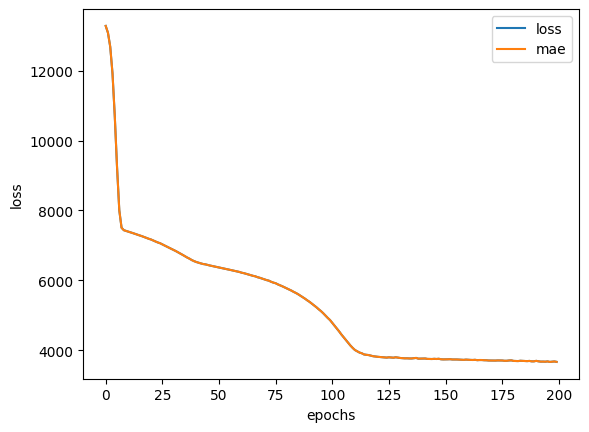

In [32]:
## Loss Curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an **EarlyStopping callback** so it stops automatically when it stops improving. We'll see this in another module

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

# Preprocessing Data

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
Which one should you use?
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

- Scikit-Learn's documentation on preprocessing data.
- Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.(https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [35]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


# create X and Y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our own train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=1)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [45]:
# What does our data look like
X_train_normal[0]

array([0.76086957, 0.28625235, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [46]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

## Modelling

In [47]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [51]:
insurance_model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               1200      
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 11ms/step - loss: 3347.3008 - mae: 3347.3008


In [50]:
# Compare modelling results from non-normalized data and normalized data
# insurance_model_2_mae, insurance_model_3_mae